## Lab04 : Classification Naive Bayes
### Name :
### ID :

**Naïve Bayes** Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP)

> Add blockquote



Naïve Bayes Classifier assumes that all the features are **unrelated** to each other. Presence or absence of a feature does not influence the presence or absence of any other feature

There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-
- Gaussian Naïve Bayes
- Multinomial Naïve Bayes
- Bernoulli Naïve Bayes

![Naive Bayes](NB.png)

In [ ]:
!pip install catboost

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=1321ad811b93e00c533d83b87edecde22be410c6c5c4ee506c7d868ddb8d4926
  Stored in directory: /root/.cache/pip/wheels/b6/a1/81/1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Correlation

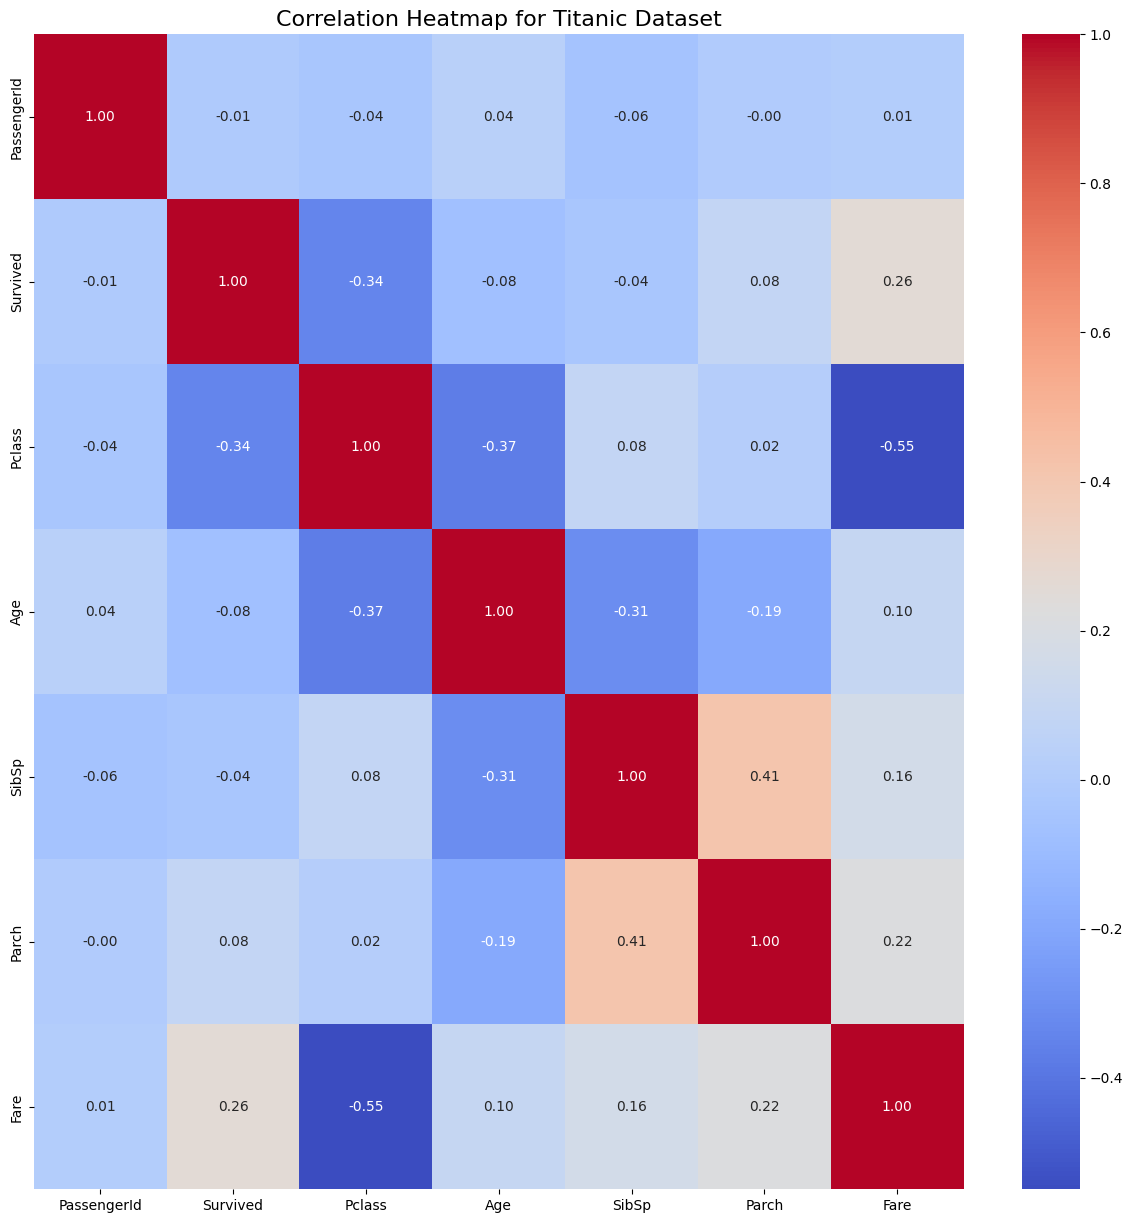

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(titanic_train.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Titanic Dataset", fontsize=16)
plt.show()

### Does Data Balanced?

<Axes: xlabel='Survived', ylabel='Count'>

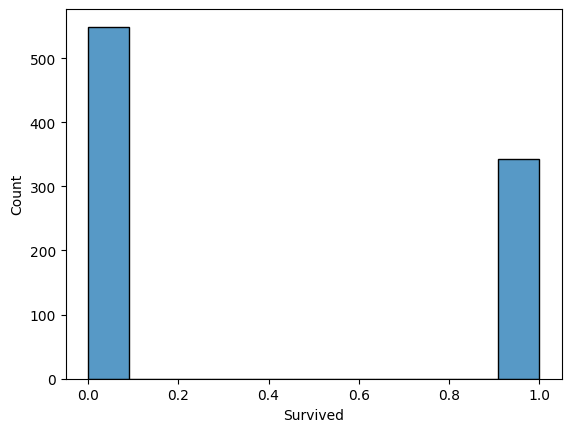

In [ ]:
sns.histplot(titanic_train.Survived)

check for **Null** values.

In [ ]:
titanic_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Plot Features that have Nulls to decide which stratgy do we use

### Age

Fill Null values

In [ ]:
# Train
titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
print(titanic_train.Age.isna().sum())

0


/tmp/ipython-input-508161829.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_train.Age[titanic_train.Age.isna()] = titanic_train.Age.mean()
/tmp/ipython-input-508161829.py:2: SettingWithCopyWarning: 
A value is trying to be set o

### Cabin

Fill Null values

In [ ]:
titanic_train=titanic_train.drop('Cabin',axis=1)

### Embarked

Fill Null values

In [ ]:

titanic_train.Embarked[titanic_train.Embarked.isna()] = titanic_train.Embarked.mode()[0]
print(titanic_train.Embarked.isna().sum())


0


/tmp/ipython-input-3133808363.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_train.Embarked[titanic_train.Embarked.isna()] = titanic_train.Embarked.mode()[0]
/tmp/ipython-input-3133808363.py:1: SettingWithCopyWarning: 
A value i

### Split Data into X,Y

In [ ]:
# Train
X = titanic_train.drop('Survived',axis=1)
Y = titanic_train['Survived']

### Split Train Data into Train and Validation sets

In [ ]:
Xtrain,Xval, Ytrain,Yval= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
Xtrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
692,693,3,"Lam, Mr. Ali",male,29.699118,0,0,1601,56.4958,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0000,S
527,528,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.000000,0,1,392091,9.3500,S
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.000000,1,1,C.A. 31921,26.2500,S


### Remove Features that is useless

In [ ]:
Xtrain = Xtrain.drop(['PassengerId','Name'],axis=1)
Xval = Xval.drop(['PassengerId','Name'],axis=1)

In [ ]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
692,3,male,29.699118,0,0,1601,56.4958,S
481,2,male,29.699118,0,0,239854,0.0000,S
527,1,male,29.699118,0,0,PC 17483,221.7792,S
855,3,female,18.000000,0,1,392091,9.3500,S
801,2,female,31.000000,1,1,C.A. 31921,26.2500,S


### Apply One-Hot-Encoding to Categorical Features

In [ ]:
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
categoryStrFeatures = [col for col in Xtrain.columns if Xtrain[col].dtypes == 'O']
categoryStrFeatures

['Sex', 'Ticket', 'Embarked']

In [ ]:
enc = ce.OneHotEncoder(cols = categoryStrFeatures)
encoded_Xtrain= enc.fit_transform(Xtrain[categoryStrFeatures])
encoded_Xval = enc.transform(Xval[categoryStrFeatures])

In [ ]:
encoded_Xtrain.head()

,Sex_1,Sex_2,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,...,Ticket_565,Ticket_566,Ticket_567,Ticket_568,Ticket_569,Ticket_570,Ticket_571,Embarked_1,Embarked_2,Embarked_3
692,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
481,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
527,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
855,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
801,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Scale Data

In [ ]:
# Standardize the features by scaling
scaler = MinMaxScaler()
scaled_encoded_Xtrain = scaler.fit_transform(encoded_Xtrain)
scaled_encoded_Xval = scaler.transform(encoded_Xval)

### Naive Bayes Classifier

In [ ]:

GNB = MultinomialNB()

GNB.fit(scaled_encoded_Xtrain, Ytrain)

MultinomialNB()

In [ ]:
print("Training Accuracy",GNB.score(encoded_Xtrain,Ytrain))

Training Accuracy 0.8384831460674157


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [ ]:
Ypredict = GNB.predict(scaled_encoded_Xval)
accuracy_score(Yval,Ypredict)

0.7988826815642458

## Lab Task

In [36]:
data = pd.read_csv("/content/PostPartumDepression.csv")
data.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [43]:
data['Problems concentrating or making decision'].values

array(['Yes', 'Yes', 'Yes', ..., 'No', 'Often', 'No'], dtype=object)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling anxious                            1503 non-null   object
 7   Feeling of guilt                           1494 non-null   object
 8   Problems of bonding with baby              1503 non-null   object
 9   Suicide attempt                            1503 non-null   object
dtypes: object(10)
memory usage: 117.6+ K

In [41]:
data.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

**Q:** Write a Python code to check for **Null** values .

In [49]:
print(data.isnull().sum())

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64


In [47]:
print(data['Feeling of guilt'].values)
print(data['Irritable towards baby & partner'].values)

['No' 'Yes' 'No' ... 'Yes' 'No' 'Maybe']
['Yes' 'No' 'No' ... 'Sometimes' 'Sometimes' 'Sometimes']


**Q:** Write a Python code to handle **Null** values .

In [48]:
# col = "Problems concentrating or making decision"

# data[col] = data[col].fillna(data[col].mode()[0])

# print(data[col].isnull().sum())
col=["Problems concentrating or making decision",'Feeling of guilt','Irritable towards baby & partner']
for i in col:
  data[i] = data[i].fillna(data[i].mode()[0])
  print(data[i].isnull().sum())



0
0
0


**Q:** Write a Python code to check data **unbalance** .

In [59]:
for col in data.columns:
    # print(col)
    print(data[col].value_counts(dropna=False))
    print("************************")

    # data[col].value_counts(dropna=False).plot(kind='bar')
    # plt.title(f"Distribution of {col}")
    # plt.xlabel("Category")
    # plt.ylabel("Count")
    # plt.show()


Age
40-45    364
35-40    349
30-35    338
45-50    271
25-30    181
Name: count, dtype: int64
************************
Feeling sad or Tearful
Yes          536
No           524
Sometimes    443
Name: count, dtype: int64
************************
Irritable towards baby & partner
Yes          561
No           499
Sometimes    443
Name: count, dtype: int64
************************
Trouble sleeping at night
Two or more days a week    640
Yes                        445
No                         418
Name: count, dtype: int64
************************
Problems concentrating or making decision
No       595
Often    473
Yes      435
Name: count, dtype: int64
************************
Overeating or loss of appetite
No            841
Yes           343
Not at all    319
Name: count, dtype: int64
************************
Feeling anxious
Yes    980
No     523
Name: count, dtype: int64
************************
Feeling of guilt
No       633
Maybe    528
Yes      342
Name: count, dtype: int64
***********

**Q:** Write a Python code to split **Data** into **Feature** and **Label**.

In [60]:
X = data.drop("Suicide attempt", axis=1)
y = data["Suicide attempt"]

**Q:** Write a Python code to split **Features** and **Labels** into **Train** and **Test**.

In [160]:
X_train, Xval, y_train, yval = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Q:** Write a Python code to One Hot Encode **Feature** at all .

In [161]:
categoryStrFeatures = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categoryStrFeatures
enc = ce.OneHotEncoder(cols = categoryStrFeatures)
encoded_Xtrain= enc.fit_transform(X_train[categoryStrFeatures])
encoded_Xval = enc.transform(Xval[categoryStrFeatures])
encoded_Xtrain.head()


,Age_1,Age_2,Age_3,Age_4,Age_5,Feeling sad or Tearful_1,Feeling sad or Tearful_2,Feeling sad or Tearful_3,Irritable towards baby & partner_1,Irritable towards baby & partner_2,...,Overeating or loss of appetite_2,Overeating or loss of appetite_3,Feeling anxious_1,Feeling anxious_2,Feeling of guilt_1,Feeling of guilt_2,Feeling of guilt_3,Problems of bonding with baby_1,Problems of bonding with baby_2,Problems of bonding with baby_3
428,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
868,0,1,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
1332,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
548,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
106,0,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0


**Q:** Write a Python code to Label Encode **Label** .

In [162]:
from sklearn.preprocessing import LabelEncoder
y = data["Suicide attempt"]
le = LabelEncoder()
data["Suicide attempt"] = le.fit_transform(y)
print(data["Suicide attempt"])

0       2
1       0
2       0
3       0
4       0
       ..
1498    0
1499    0
1500    1
1501    0
1502    0
Name: Suicide attempt, Length: 1503, dtype: int64


In [163]:
scaler = MinMaxScaler()
scaled_encoded_Xtrain = scaler.fit_transform(encoded_Xtrain)
scaled_encoded_Xval = scaler.transform(encoded_Xval)

**Q:** Write a Python code to Create **Naive Bayes Classifier** Object.

In [164]:
GNB = MultinomialNB()

GNB.fit(scaled_encoded_Xtrain, y_train)

MultinomialNB()

**Q:** Write a Python code to get **score** of **Naive Bayes Classifier** Object.

In [165]:
print("Training Accuracy",GNB.score(encoded_Xtrain,y_train))

Training Accuracy 0.6039933444259568


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [166]:
Ypredict = GNB.predict(scaled_encoded_Xval)
accuracy_score(yval,Ypredict)

0.6245847176079734

In [167]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(scaled_encoded_Xtrain, y_train)
print("Training Accuracy",GNB.score(encoded_Xtrain,y_train))
Ypredict = GNB.predict(scaled_encoded_Xval)
accuracy_score(yval,Ypredict)

Training Accuracy 0.608153078202995


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.6511627906976745

In [168]:
from sklearn.naive_bayes import BernoulliNB
GNB = BernoulliNB()
GNB.fit(scaled_encoded_Xtrain, y_train)
print("Training Accuracy",GNB.score(encoded_Xtrain,y_train))
Ypredict = GNB.predict(scaled_encoded_Xval)
accuracy_score(yval,Ypredict)

Training Accuracy 0.5815307820299501


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


0.6046511627906976